**Name: XXXXXX**
**Student ID: pxxxxxx**

###**Import libraries**

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

## **Data Consolidation**

**Import raw dataset from a CSV file into a dataframe**

In [42]:
df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


**Show the number of records and columns as well as features**

In [43]:
print("Number of records:", df.shape[0])
print("Number of columns:", df.shape[1])
print('-'*100)
print("The attributes of data :", df.columns.values)

Number of records: 200
Number of columns: 5
----------------------------------------------------------------------------------------------------
The attributes of data : ['CustomerID' 'Gender' 'Age' 'Annual Income (k$)' 'Spending Score (1-100)']


**Show the details of the dataframe**

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## **Data Cleaning**

**Rename feature columns**

In [45]:
df.rename(columns={'Annual Income (k$)':'Income', 'Spending Score (1-100)':'Score'},inplace=True)
df.head()

,CustomerID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**Check duplicates**

In [46]:
df.duplicated().sum()

0

**Check missing values**

In [47]:
print('Is there any missing value?',df.isnull().values.any())
missing_percentage = (df.isnull().sum() / (df.shape[0])) * 100
missing_value_df = pd.DataFrame({'Count': df.isnull().sum(),'Percentage': missing_percentage})
missing_value_df[missing_value_df.Count != 0]

Is there any missing value? False


,Count,Percentage


## **Data Transformation**

In [48]:
df['Gender'] = df['Gender'].map({'Male': 1, "Female": 0})
df

,CustomerID,Gender,Age,Income,Score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


**Correlation analysis**

<Axes: >

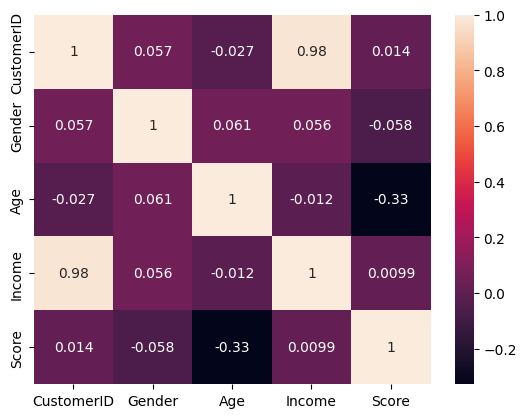

In [49]:
sns.heatmap(df.corr(), annot = True)

## **Data Exploration**

In [50]:
df.describe()

,CustomerID,Gender,Age,Income,Score
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.440000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,0.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


<Figure size 1600x1000 with 0 Axes>

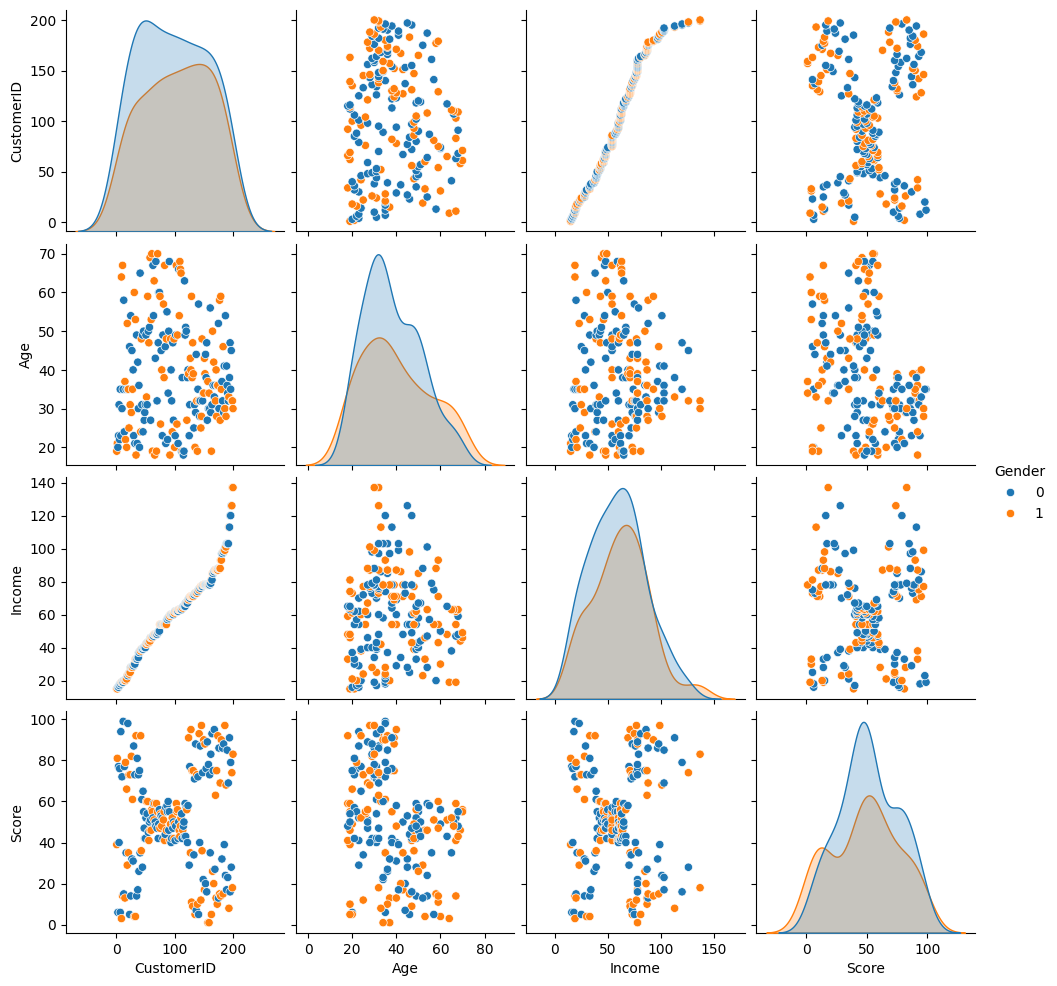

In [51]:
plt.figure(1, figsize=(16,10))
sns.pairplot(data=df, hue='Gender')
plt.show()

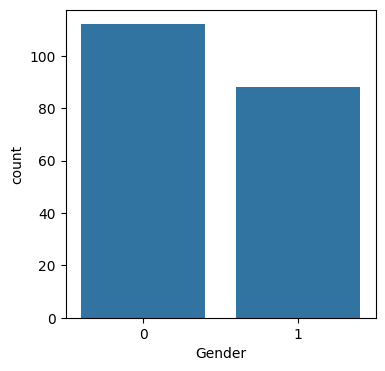

In [52]:
plt.figure(1, figsize=(4,4))
sns.countplot(x='Gender', data=df)
plt.show()

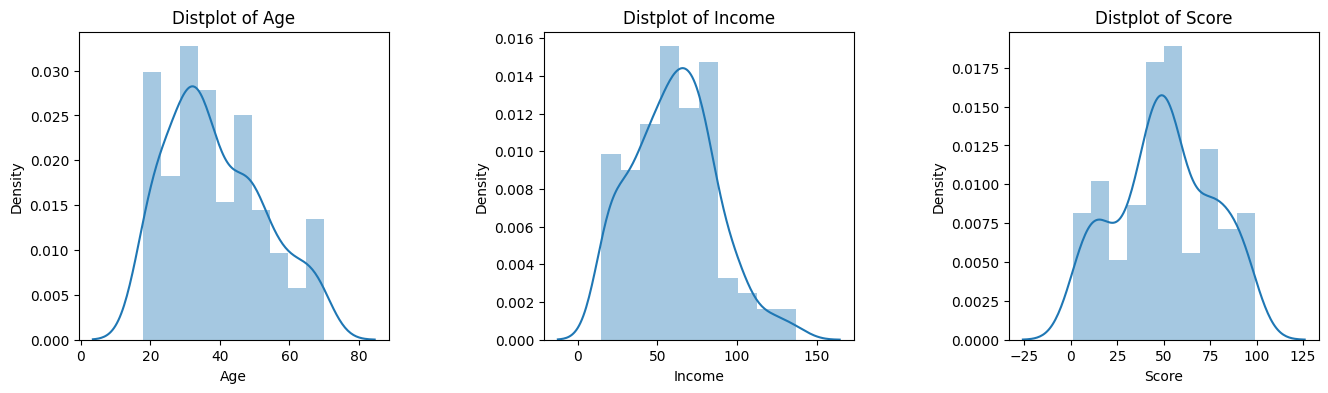

In [53]:
plt.figure(1, figsize=(16,4))
n = 0
for x in ['Age', 'Income', 'Score']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace=0.5 , wspace=0.5)
    sns.distplot(df[x] , bins=10)
    plt.title('Distplot of {}'.format(x))
plt.show()

## **Using Elbow and Silhoutte methods**

In [54]:
# ignore CustomerID
X = df.iloc[:, -4:]
X

,Gender,Age,Income,Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [55]:
km_inertias, km_scores = [], []

# clustering criteria
filtered_data = X[['Age','Income','Score']]
scaler = StandardScaler()
model = scaler.fit(filtered_data)
scaled_data = model.transform(filtered_data)

for k in range(2, 10):
    km = KMeans(n_clusters=k).fit(scaled_data)
    km_inertias.append(km.inertia_)
    km_scores.append(silhouette_score(scaled_data, km.labels_))
    print(f"Processing K-Means with k = {k}, Inertia = {km.inertia_}, Silhoutte Score = {silhouette_score(scaled_data, km.labels_)}")

Processing K-Means with k = 2, Inertia = 389.38618895643714, Silhoutte Score = 0.33547192894004574
Processing K-Means with k = 3, Inertia = 297.00280742381, Silhoutte Score = 0.35027143562558555
Processing K-Means with k = 4, Inertia = 205.22514747675913, Silhoutte Score = 0.4039582785148566
Processing K-Means with k = 5, Inertia = 168.2475801755683, Silhoutte Score = 0.41664341513732767
Processing K-Means with k = 6, Inertia = 159.59824823201902, Silhoutte Score = 0.3935787885270898
Processing K-Means with k = 7, Inertia = 117.15611316079165, Silhoutte Score = 0.4202943972835935
Processing K-Means with k = 8, Inertia = 106.0822915868805, Silhoutte Score = 0.4161758698717836
Processing K-Means with k = 9, Inertia = 102.90693139163612, Silhoutte Score = 0.3524024301175306


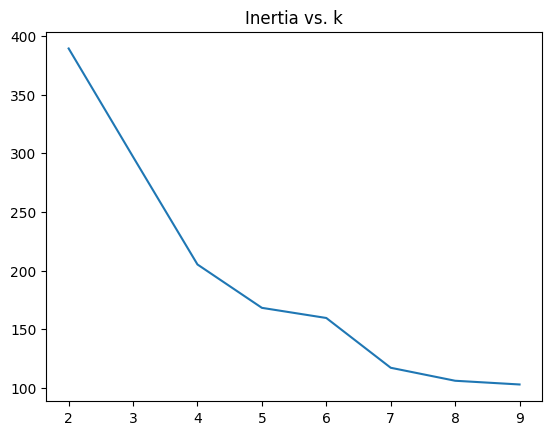

In [56]:
k_values = range(2, 10)
plt.plot(k_values,km_inertias)
plt.xticks(ticks=k_values, labels=k_values)
plt.title('Inertia vs. k')
plt.show()

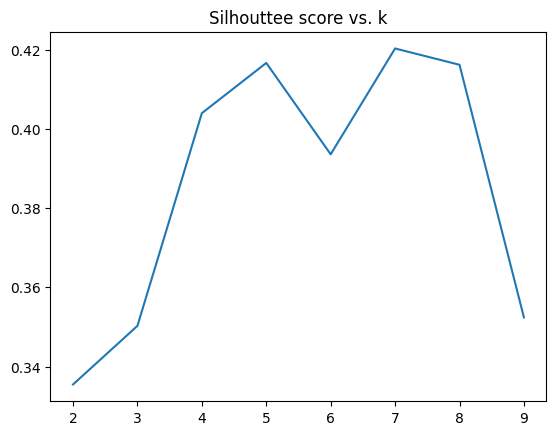

In [57]:
plt.plot(k_values, km_scores)
plt.xticks(ticks=k_values, labels=k_values)
plt.title('Silhouttee score vs. k')
plt.show()

In [77]:
# The optimal value of k
optimal_k = 5

In [78]:
km = KMeans(n_clusters=optimal_k).fit(scaled_data)

In [79]:
X['Label'] = km.labels_
X

,Gender,Age,Income,Score,Label
0,1,19,15,39,2
1,1,21,15,81,2
2,0,20,16,6,4
3,0,23,16,77,2
4,0,31,17,40,2
...,...,...,...,...,...
195,0,35,120,79,1
196,0,45,126,28,0
197,1,32,126,74,1
198,1,32,137,18,0


In [80]:
X['Label'].unique()

array([2, 4, 3, 0, 1], dtype=int32)

In [81]:
X.Label.value_counts()

Label
2    54
3    47
1    40
0    39
4    20
Name: count, dtype: int64

In [82]:
pivot = X.pivot_table(values=['Gender','Age','Income','Score'], index=['Label'], aggfunc=np.mean)
pivot

,Age,Gender,Income,Score
Label,,,,
0,39.871795,0.512821,86.102564,19.358974
1,32.875000,0.450000,86.100000,81.525000
2,25.185185,0.407407,41.092593,62.240741
3,55.638298,0.425532,54.382979,48.851064
4,46.250000,0.400000,26.750000,18.350000


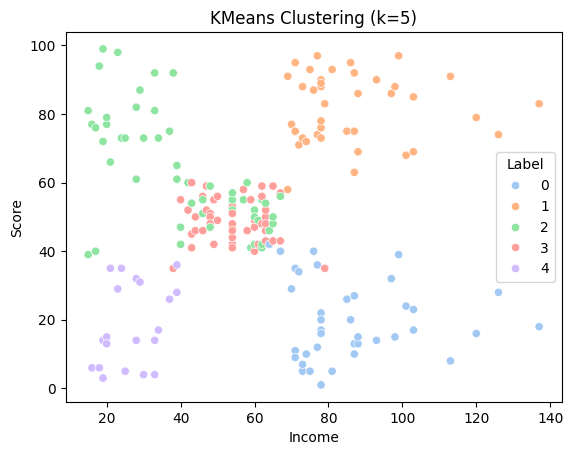

In [83]:
sns.scatterplot(x=X['Income'],y=X['Score'],hue=X['Label'],palette="pastel")
plt.title('KMeans Clustering (k={})'.format(optimal_k))
plt.show()

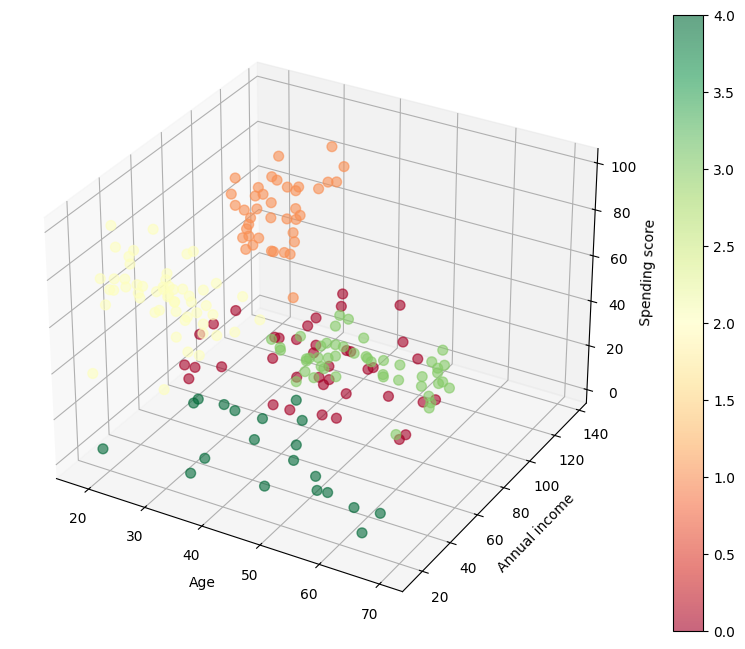

In [84]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

xs = X['Age']
ys = X['Income']
zs = X['Score']
im = ax.scatter(xs, ys, zs, s=50, alpha=0.6, c=km.labels_, cmap='RdYlGn')
fig.colorbar(im, ax=ax)
ax.set_xlabel('Age')
ax.set_ylabel('Annual income')
ax.set_zlabel('Spending score')

plt.show()

In [85]:
# observe the characteristics of each cluster
for k in range(optimal_k):
    print(f'Cluster nb : {k}')
    print(X[X.Label == k].describe().iloc[:, 1:-1])
    print('\n\n')


Cluster nb : 0
             Age      Income      Score
count  39.000000   39.000000  39.000000
mean   39.871795   86.102564  19.358974
std    10.938054   16.725013  11.610991
min    19.000000   64.000000   1.000000
25%    34.000000   74.500000  10.500000
50%    41.000000   78.000000  17.000000
75%    47.000000   95.000000  27.500000
max    59.000000  137.000000  42.000000



Cluster nb : 1
             Age      Income      Score
count  40.000000   40.000000  40.000000
mean   32.875000   86.100000  81.525000
std     3.857643   16.339036   9.999968
min    27.000000   69.000000  58.000000
25%    30.000000   74.750000  74.000000
50%    32.000000   78.500000  83.000000
75%    36.000000   94.000000  90.000000
max    40.000000  137.000000  97.000000



Cluster nb : 2
             Age     Income      Score
count  54.000000  54.000000  54.000000
mean   25.185185  41.092593  62.240741
std     5.508395  16.815613  16.596130
min    18.000000  15.000000  39.000000
25%    21.000000  25.750000  50.00

**Question 1: Which setting (i.e., the combination of clustering criteria and the optimal value of k) would give you the most meaningful and explanatory result?**

In [86]:
# generalise each cluster's characteristics
cluster_characteristics = pd.DataFrame()
for k in range(optimal_k):
    cluster_characteristics[f'Cluster {k}'] = X[X.Label == k].describe().iloc[:, 1:-1].median(axis=0)
cluster_characteristics

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4
Age,39.435897,32.4375,24.592593,51.50,41.500
Income,76.250000,76.6250,40.546296,50.75,23.250
Score,18.179487,77.7625,56.000000,47.50,16.425


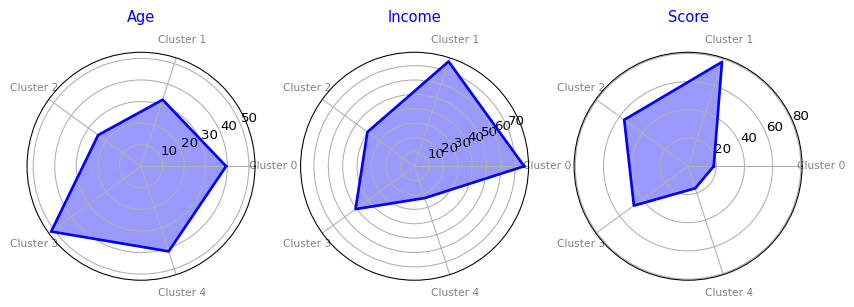

In [87]:
# plot the characteristics of each cluster in a radar chart, with 3 axes: Age, income, score
from math import pi

def make_spider(row, title, color):
    categories = list(cluster_characteristics)
    N = len(categories)

    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    ax = plt.subplot(2, 3, row+1, polar=True, )

    plt.xticks(angles[:-1], categories, color='grey', size=8)

    values = cluster_characteristics.iloc[row].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    plt.title(title, size=11, color=color, y=1.1)
    
my_dpi=96
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)

for row in range(0, len(cluster_characteristics.index)):
    # title is the name of the feature
    make_spider(row=row, title=cluster_characteristics.index[row], color='blue')
    
plt.show()

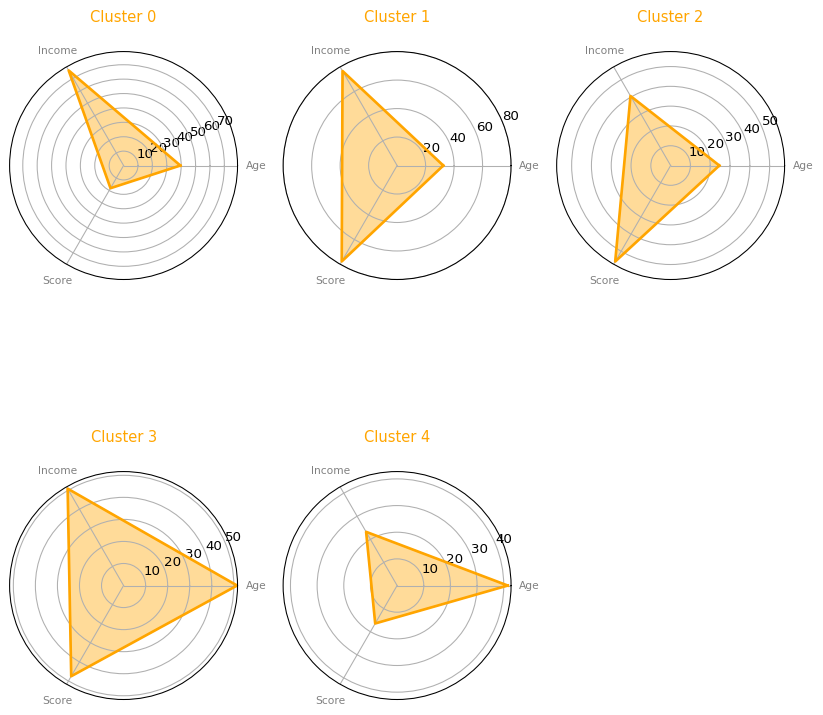

In [88]:
# create radar chart for each features of each cluster
# for row in range(0, len(cluster_characteristics.index)):
#     # title is the name of the feature
#     make_spider(row=row, title=cluster_characteristics.index[row], color='blue')
def make_spider_cluster(col, title, color):
    # categories are index of cluster_characteristics
    categories = list(cluster_characteristics.index)
    N = len(categories)

    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    ax = plt.subplot(2, 3, row+1, polar=True, )

    plt.xticks(angles[:-1], categories, color='grey', size=8)

    values = cluster_characteristics.iloc[:,col].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    plt.title(title, size=11, color=color, y=1.1)

my_dpi=96
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)

for row in range(0, len(cluster_characteristics.columns)):
    # title is the name of the feature
    make_spider_cluster(col=row, title=f'Cluster {row}', color='orange')

Answer 1: with k = 5, the clustering result is the most meaningful and explanatory result. Because the silhouette score is the highest and the elbow method shows that the curve is the most steep at k = 5.

**Question 2: Based on your result in Question 1, please briefly suggest your sales / marketing strategy for each of the customer groups.**

Answer 2: 
- Group 0: Highest expense score, highest income score, relative lower age score. This group is the most potential group. We should focus on this group and try to actively keep them as our customers.
- Group 1: Lowest expense score, lowest income score, relative higher age score. This group is the least potential group and the least attention should be paid to this group.
- Group 2: Middle expense score, middle income score, relative middle age score. This group is the most stable group and we should try to keep them as our long-term customers.
- Group 3: Lower expense score, middle income score, relative lower age score. Although this group has a lower expense score, it has potential to be our customers. We should try to attract them to become cluster 1 customers.
- Group 4: Middle expense score, highest income score, lowest age score. This group is the most potential group as when the customer in this group grows older, they will become cluster 0 customers. We should try to attract them to become cluster 0 customers.